In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [25]:
#import neccessary libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
import plotly.graph_objects as go
import pandas as pd

In [1]:
all_data_ = "/content/drive/MyDrive/Training_Datasets/MRI_CANCER/brain_tumor_dataset"

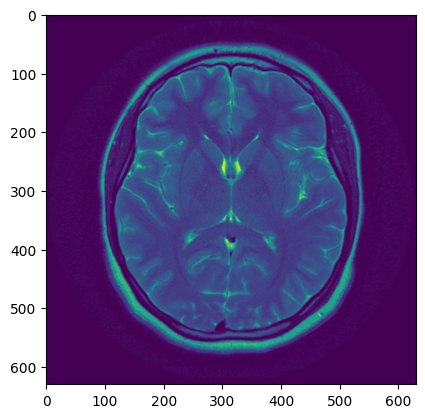

In [6]:
img = mpimg.imread("/content/drive/MyDrive/Training_Datasets/MRI_CANCER/brain_tumor_dataset/no/1 no.jpeg")
plt.imshow(img)

In [7]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
img.shape

(630, 630)

In [10]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (725, 728, 4)


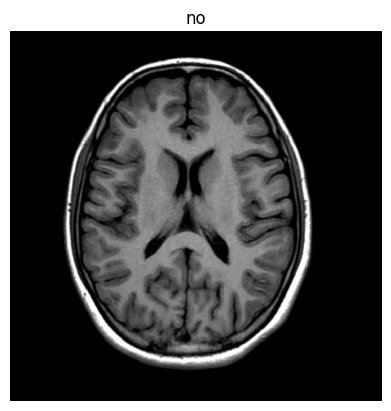

In [14]:
img_no = view_random_image(target_dir="/content/drive/MyDrive/Training_Datasets/MRI_CANCER/brain_tumor_dataset/",
                        target_class="no")

Image shape: (355, 290, 3)


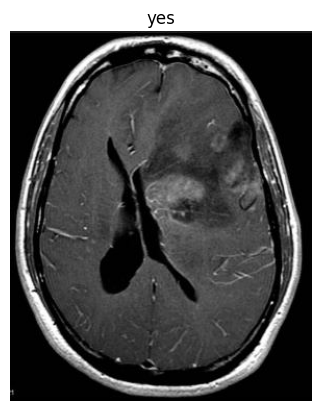

In [15]:
img_yes= view_random_image(target_dir="/content/drive/MyDrive/Training_Datasets/MRI_CANCER/brain_tumor_dataset/",
                        target_class="yes")

# **Data Process**

In [16]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              validation_split=0.8,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              rotation_range=25)

In [17]:
train_data = generator.flow_from_directory(all_data_,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary", 
                                               seed=42)

test_data = generator.flow_from_directory(all_data_,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


# **CNN**

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"), 
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

In [19]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [20]:
model_history = model.fit(train_data, 
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/50
8/8 [==============================] - 171s 21s/step - loss: 0.6395 - accuracy: 0.6087 - val_loss: 0.5087 - val_accuracy: 0.7787
Epoch 2/50
8/8 [==============================] - 125s 16s/step - loss: 0.5579 - accuracy: 0.7628 - val_loss: 0.5333 - val_accuracy: 0.7866
Epoch 3/50
8/8 [==============================] - 104s 13s/step - loss: 0.5435 - accuracy: 0.7510 - val_loss: 0.4916 - val_accuracy: 0.7787
Epoch 4/50
8/8 [==============================] - 125s 16s/step - loss: 0.4796 - accuracy: 0.7826 - val_loss: 0.4426 - val_accuracy: 0.8103
Epoch 5/50
8/8 [==============================] - 122s 16s/step - loss: 0.4323 - accuracy: 0.7984 - val_loss: 0.4282 - val_accuracy: 0.8063
Epoch 6/50
8/8 [==============================] - 108s 14s/step - loss: 0.4193 - accuracy: 0.8103 - val_loss: 0.3743 - val_accuracy: 0.8498
Epoch 7/50
8/8 [==============================] - 102s 13s/step - loss: 0.3976 - accuracy: 0.8419 - val_loss: 0.3490 - val_accuracy: 0.8933
Epoch 8/50
8/8 [====

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                    

In [35]:




# Convert the model_history dictionary to a DataFrame
model_history_df = pd.DataFrame.from_dict(model_history.history)

# Create a Plotly figure and add line traces for each column in the DataFrame
fig = go.Figure()
for column in model_history_df.columns:
    fig.add_trace(go.Scatter(x=model_history_df.index, y=model_history_df[column], mode='lines', name=column))

# Update the layout of the figure
fig.update_layout(title='Model History', xaxis_title='Epochs', yaxis_title='Metrics')

# Show the plot
fig.show()